In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("StudentPerformanceFactors.csv")

data.ffill(inplace=True)
data.drop_duplicates(inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

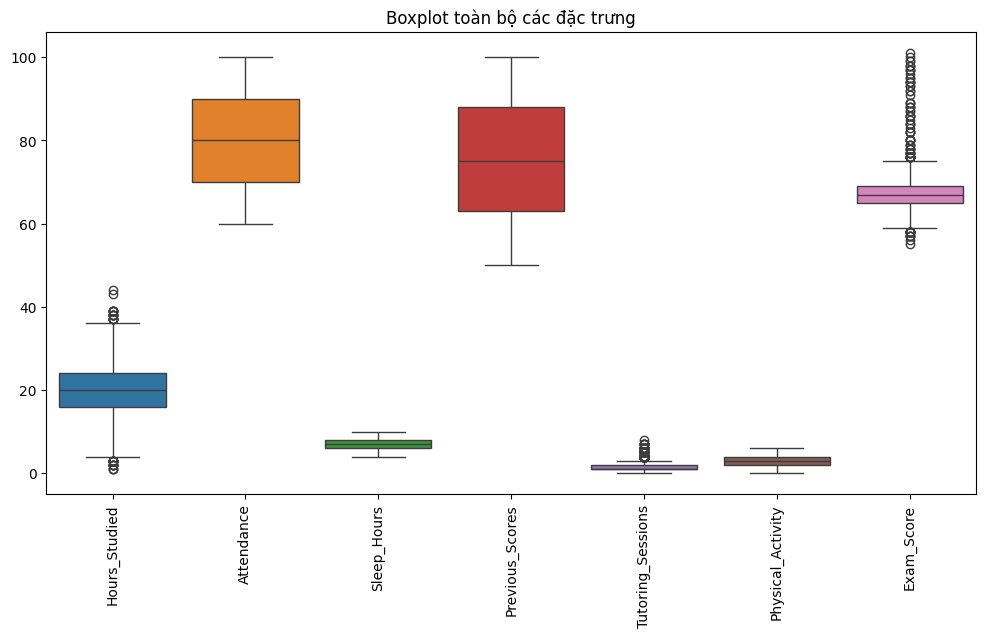

In [3]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Boxplot toàn bộ các đặc trưng')
plt.show()

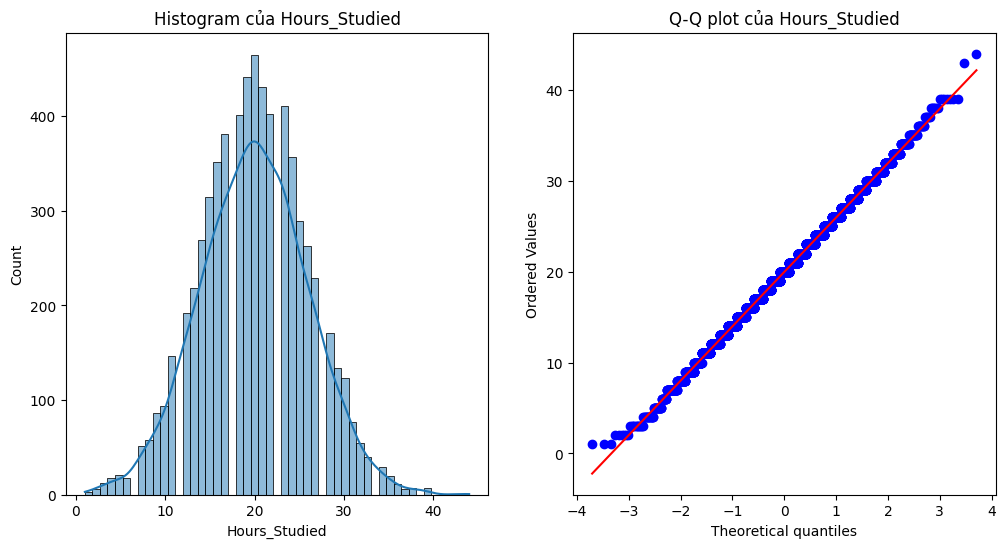

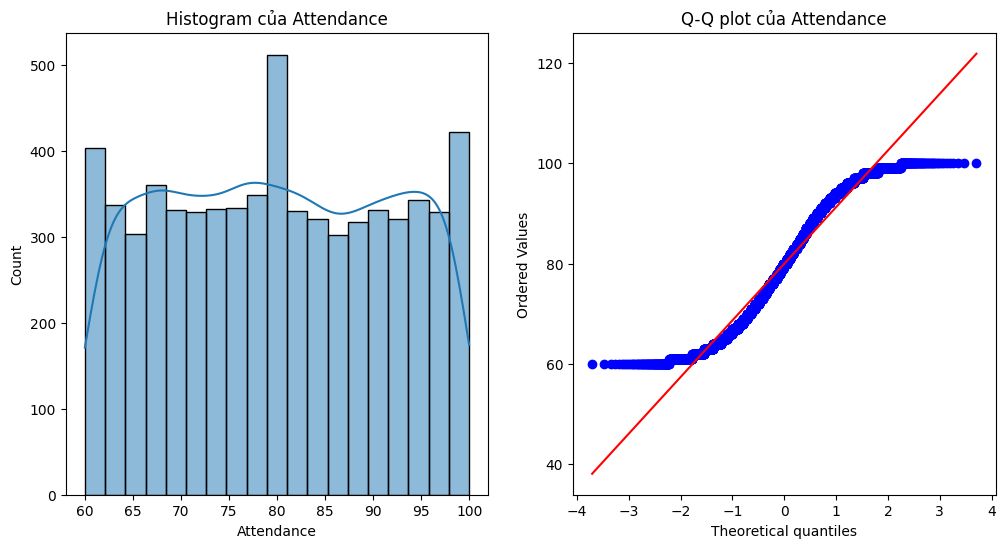

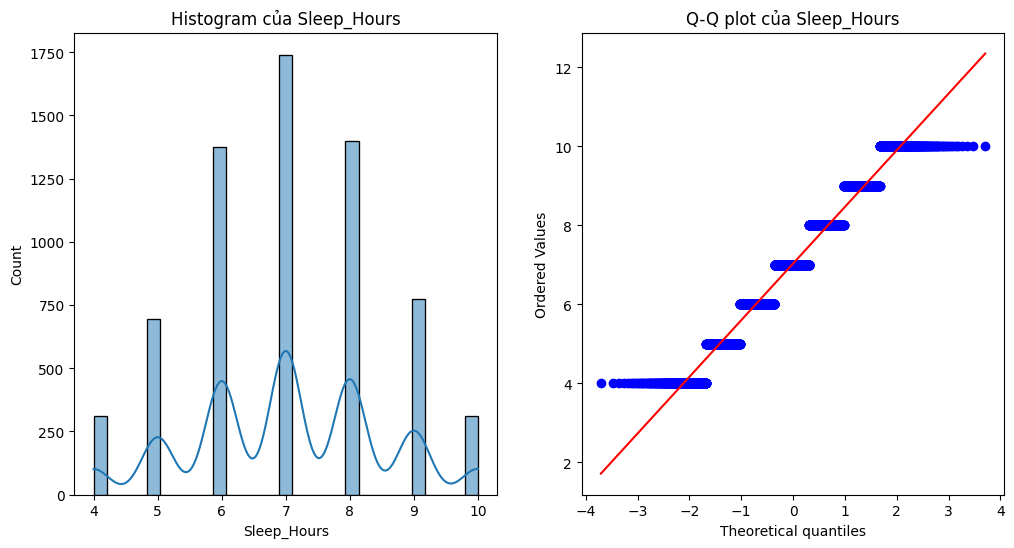

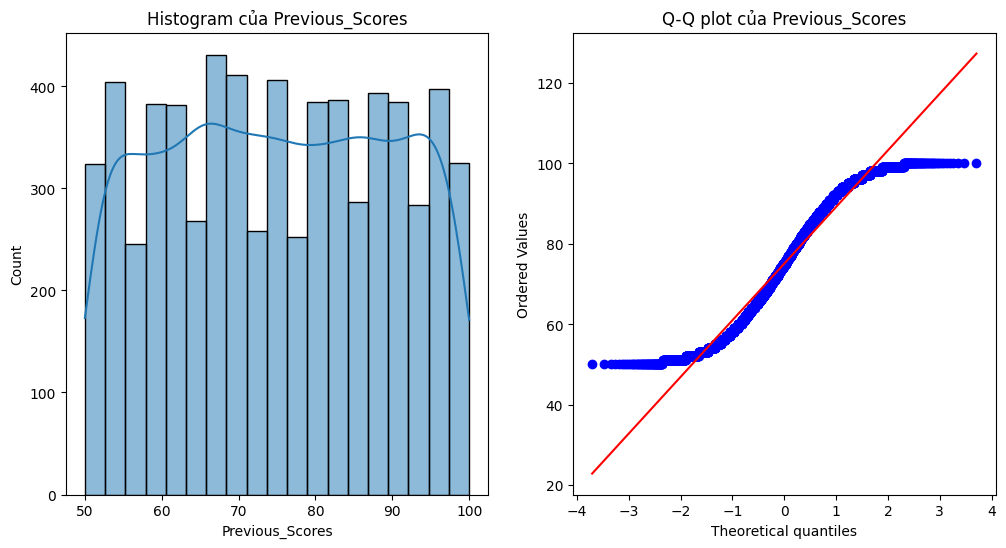

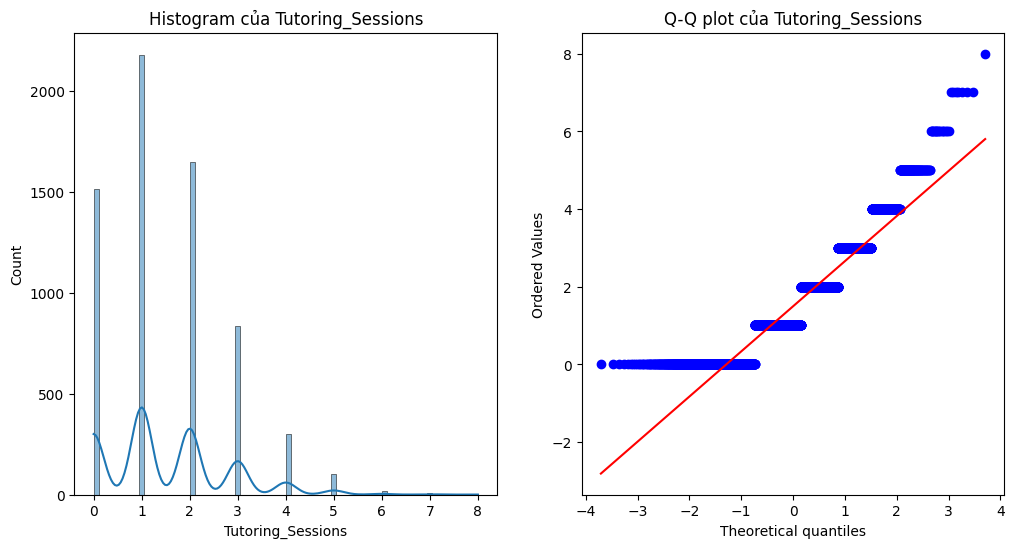

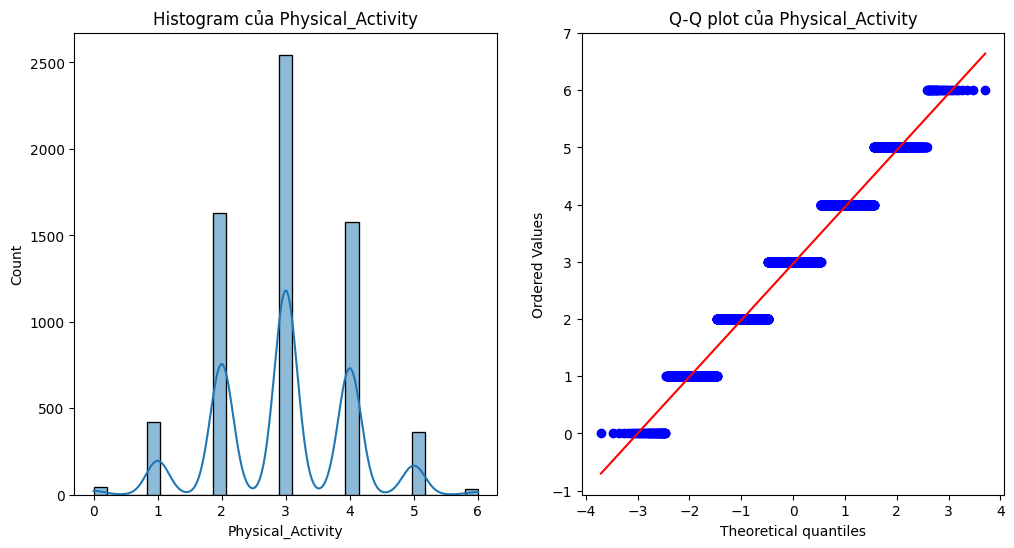

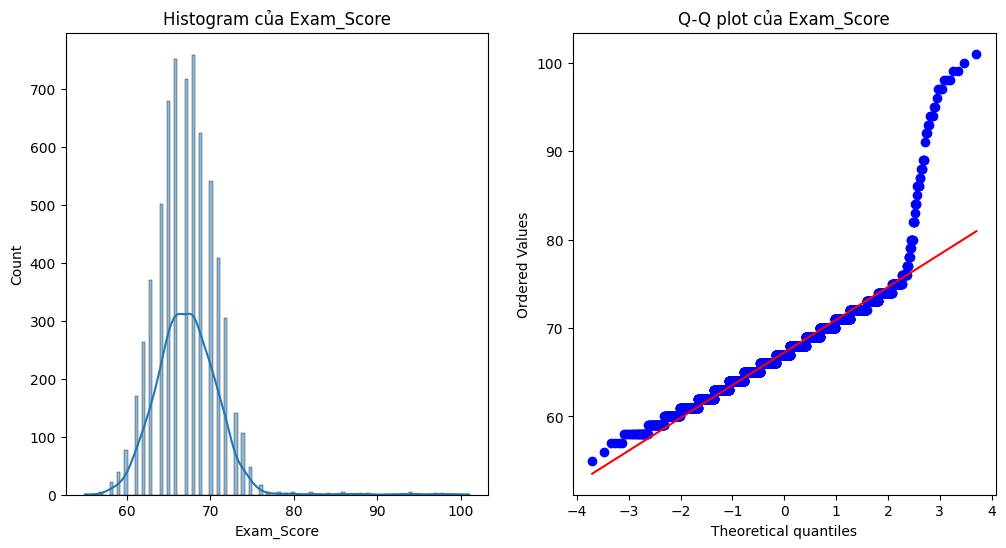

In [6]:
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    # Vẽ Histogram
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f"Histogram của {column}")

    # Vẽ Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f"Q-Q plot của {column}")

    plt.show()


In [ ]:
data_cleaned = data.copy()

numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    mean = data_cleaned[column].mean()
    std_dev = data_cleaned[column].std()

    median = data_cleaned[column].median()

    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev

    data_cleaned[column] = data_cleaned[column].apply(
        lambda x: median if x < lower_bound or x > upper_bound else x
    )

data_cleaned.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.953988,79.977448,7.02906,75.070531,1.472680,2.967610,67.067353
std,5.876595,11.547475,1.46812,14.399784,1.192038,1.031231,3.327812
min,3.000000,60.000000,4.00000,50.000000,0.000000,0.000000,56.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,37.000000,100.000000,10.00000,100.000000,5.000000,6.000000,78.000000


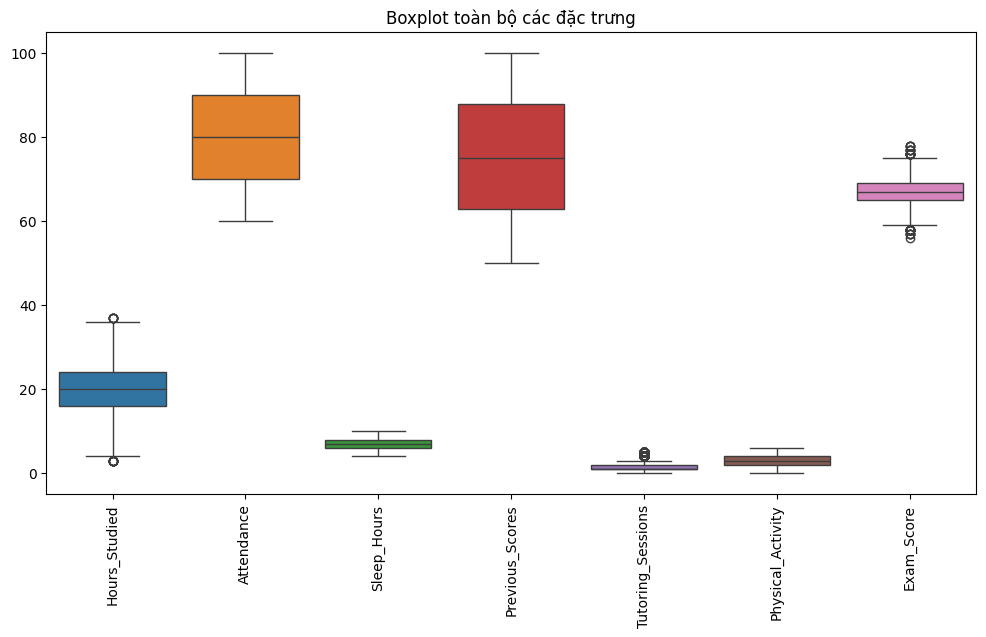

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned)
plt.xticks(rotation=90)
plt.title('Boxplot toàn bộ các đặc trưng')
plt.show()

In [ ]:
data_labeled = data_cleaned.copy()
label_encoders = {}
for column in data_labeled.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_labeled[column] = le.fit_transform(data_labeled[column].astype(str))
    label_encoders[column] = le

data_labeled.info()
data_labeled.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   float64
 1   Attendance                  6607 non-null   int64  
 2   Parental_Involvement        6607 non-null   int64  
 3   Access_to_Resources         6607 non-null   int64  
 4   Extracurricular_Activities  6607 non-null   int64  
 5   Sleep_Hours                 6607 non-null   int64  
 6   Previous_Scores             6607 non-null   int64  
 7   Motivation_Level            6607 non-null   int64  
 8   Internet_Access             6607 non-null   int64  
 9   Tutoring_Sessions           6607 non-null   float64
 10  Family_Income               6607 non-null   int64  
 11  Teacher_Quality             6607 non-null   int64  
 12  School_Type                 6607 non-null   int64  
 13  Peer_Influence              6607 

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23.0,84,1,0,0,7,73,1,1,0.0,1,2,1,2,3,0,1,2,1,67.0
1,19.0,64,1,2,0,8,59,1,1,2.0,2,2,1,0,4,0,0,1,0,61.0
2,24.0,98,2,2,1,7,91,2,1,2.0,2,2,1,1,4,0,2,2,1,74.0
3,29.0,89,1,2,1,8,98,2,1,1.0,2,2,1,0,4,0,1,1,1,71.0
4,19.0,92,2,2,1,6,65,2,1,3.0,2,0,1,1,4,0,0,2,0,70.0


In [ ]:
X = data_labeled.drop('Exam_Score', axis=1)  # Tập dữ liệu đầu vào
y = data_labeled['Exam_Score']  # Biến mục tiêu

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Tính toán các thước đo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
score = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"Cross-Validation Score: {score.mean()}")

Mean Squared Error: 1.7624362808442204
Mean Absolute Error: 1.0038482765355228
R-squared: 0.8403085259977185
Cross-Validation Score: 0.8389465766762344


In [ ]:
pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Expanded parameter grid
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [5, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2', 1.0]
}

# Perform grid search with cross validation
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='r2'
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'rf__max_depth': 20, 'rf__max_features': 1.0, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Best CV score: 0.8459


In [ ]:
#best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Tính toán các thước đo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.5966575255378817
Mean Absolute Error: 0.9410982458455983
R-squared: 0.8553294683607819


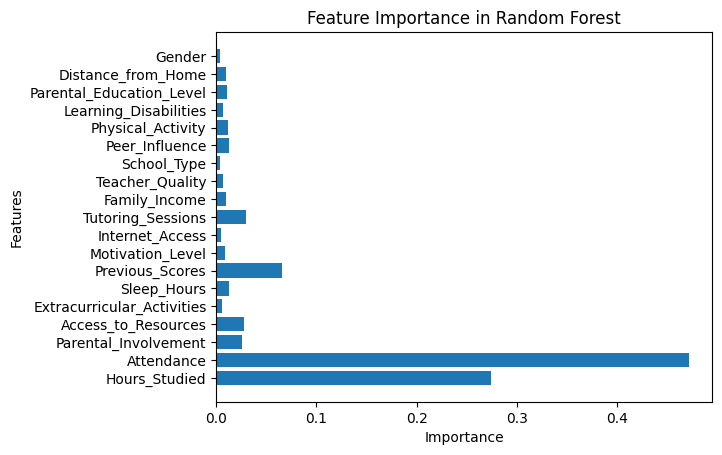

In [ ]:
feature_importances = best_model.named_steps['rf'].feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.show()

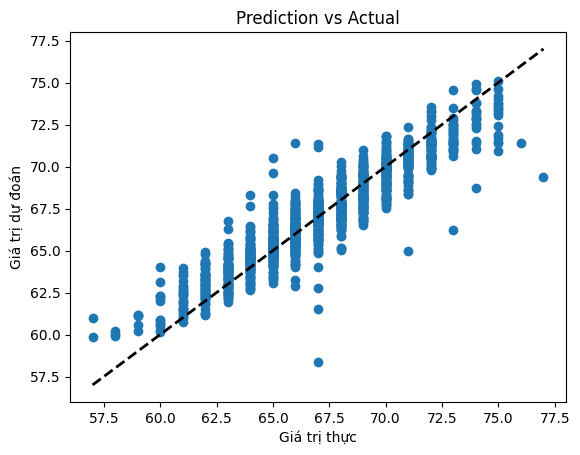

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Giá trị thực')
plt.ylabel('Giá trị dự đoán')
plt.title('Prediction vs Actual')
plt.show()

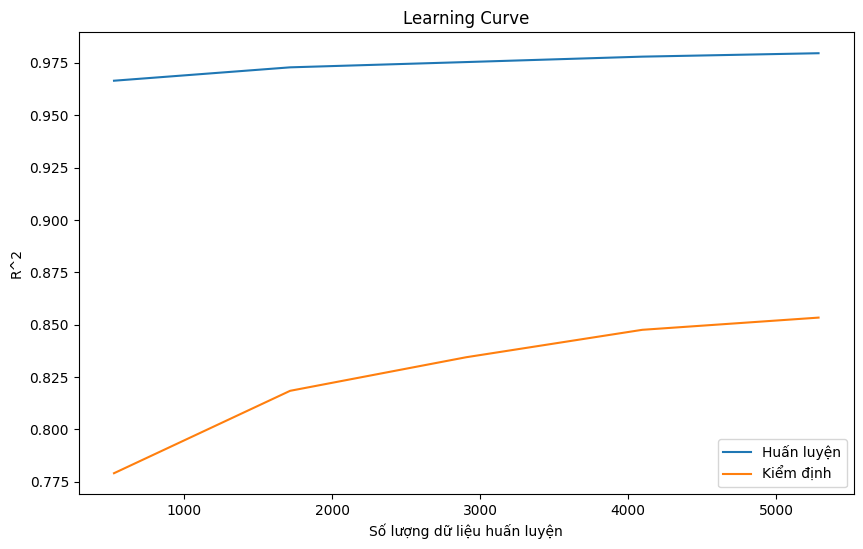

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5, scoring='r2')
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Huấn luyện')
plt.plot(train_sizes, test_mean, label='Kiểm định')
plt.xlabel('Số lượng dữ liệu huấn luyện')
plt.ylabel('R^2')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [ ]:
data_test = pd.DataFrame({
    'Hours_Studied': [30],
    'Attendance': [85],
    'Parental_Involvement': ['Medium'],
    'Access_to_Resources': ['Medium'],
    'Extracurricular_Activities': ['Yes'],
    'Sleep_Hours': [8],
    'Previous_Scores': [70],
    'Motivation_Level': ['Medium'],
    'Internet_Access': ['Yes'],
    'Tutoring_Sessions': [0],
    'Family_Income': ['Low'],
    'Teacher_Quality': ['High'],
    'School_Type': ['Public'],
    'Peer_Influence': ['Positive'],
    'Physical_Activity': [5],
    'Learning_Disabilities': ['No'],
    'Parental_Education_Level': ['High School'],
    'Distance_from_Home': ['Moderate'],
    'Gender': ['Female']
}, index=[0])

data_test_cleaned = data_test.copy()
label_encoders = {}
for column in data_test_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_test_cleaned[column] = le.fit_transform(data_test_cleaned[column].astype(str))
    label_encoders[column] = le

y_pred = model.predict(data_test_cleaned)
y_pred = y_pred.round().astype(int)
print(y_pred)

[71]


In [ ]:
y_pred = best_model.predict(data_test_cleaned)
y_pred = y_pred.round().astype(int)
print(y_pred)

[67]
